In [1]:
from sklearn.datasets import load_svmlight_file 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#读取数据并划分训练集合和验证集
X_train,y_train=load_svmlight_file("a9a_data")
X_val,y_val=load_svmlight_file("a9a_test_data",n_features=123)
X_train=X_train.toarray()
X_val=X_val.toarray()

print("X_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

X_train shape (32561, 123)
X_val shape (16281, 123)
y_train shape (32561,)
y_val shape (16281,)


In [3]:
#将y标签中的-1数据改为0数据
for i in range(y_train.shape[0]):
    if y_train[i]==-1:
        y_train[i]=0
for i in range(y_val.shape[0]):
    if y_val[i]==-1:
        y_val[i]=0

In [4]:
#在原数据中插入一列1值
X_train_one=np.ones(X_train.shape[0])
X_val_one=np.ones(X_val.shape[0])
X_train=np.insert(X_train,0,values=X_train_one,axis=1)
X_val=np.insert(X_val,0,values=X_val_one,axis=1)
print(X_train.shape)
print(X_val.shape)

(32561, 124)
(16281, 124)


In [5]:
#初始化模型参数
W=np.zeros((X_train.shape[1],1))
print(W.shape)


(124, 1)


In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
#定义假设函数hypothetical function
def h(W,X):
    m=X.shape[0]
    z=X.dot(W)
    assert(z.shape==(m,1))
    return sigmoid(z)

In [8]:
#定义loss函数
def Loss(W,X,y):
    m=X.shape[0]
    loss=(-1/m)*sum((y*np.log(h(W,X)))+((1-y)*np.log(1-h(W,X))))

        
    return loss
    

In [9]:
#定义预测函数，以0.5为阈值
def predict(W,X):
    m=X.shape[0]
    y=h(W,X)
    Y_prediction=np.zeros((m,1))
    for i in range(m):
        if y[i,0]>0.5:
            Y_prediction[i,0]=1
        else:
            Y_prediction[i,0]=0
    return Y_prediction

In [10]:
#梯度下降
def gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method,epoch=1000,random_seed=None,batch_size=None):
    """
    计算导数,并更新W,同时计算训练损失和验证损失
    """
    train_loss=np.zeros(epoch)
    val_loss=np.zeros(epoch)

    m=X_train.shape[0]
    y_train=y_train.reshape((y_train.shape[0],1))
    y_val=y_val.reshape((y_val.shape[0],1))
    if method=="BGD": #批量梯度下降
        for i in range(epoch):
            train_loss[i]=Loss(W,X_train,y_train)
            val_loss[i]=Loss(W,X_val,y_val)

            W=W-(alpha/m)*(X_train.T.dot((h(W,X_train)-y_train)))
        return W,train_loss,val_loss
    elif method=="SGD":#随机梯度下降   
        np.random.seed(random_seed)
        rand_arr=np.arange(X_train.shape[0])
        for i in range(epoch):
            train_loss[i]=Loss(W,X_train,y_train)
            val_loss[i]=Loss(W,X_val,y_val)

            np.random.shuffle(rand_arr)
            index=rand_arr[0:1]
            X_train_one=X_train[index]
            y_train_one=y_train[index]           
            W=W-alpha*((h(W,X_train_one)-y_train_one)*X_train_one.T)
        return W,train_loss,val_loss
    else: #method=="MBGD" 小批量随机梯度下降
        np.random.seed(random_seed)
        rand_arr=np.arange(X_train.shape[0])
        for i in range(epoch):
            train_loss[i]=Loss(W,X_train,y_train)
            val_loss[i]=Loss(W,X_val,y_val)

            np.random.shuffle(rand_arr)
            batch_size=int(batch_size)
            index=rand_arr[0:batch_size]
            X_train_batch=X_train[index]
            y_train_batch=y_train[index]
            W=W-(alpha/m)*(X_train_batch.T.dot((h(W,X_train_batch)-y_train_batch)))
        return W,train_loss,val_loss

In [11]:
#使用随机批量梯度下降
epoch=5000
alpha=1
new_W,train_loss,val_loss=gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method="MBGD",epoch=epoch,random_seed=2019,batch_size=200)


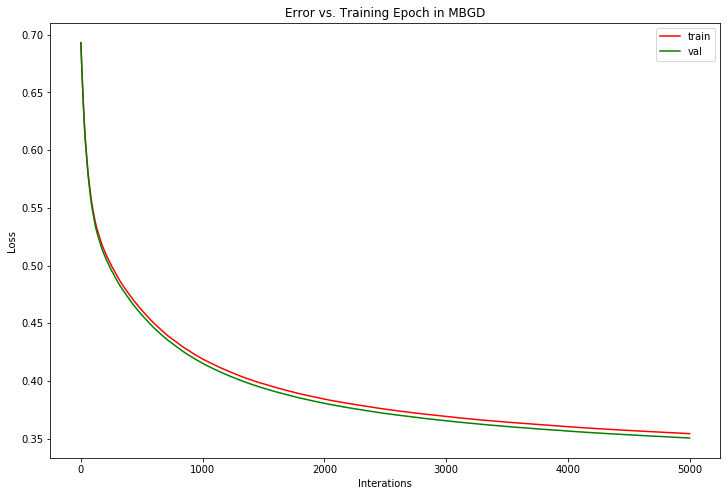

In [12]:
#画出学习曲线
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), train_loss, 'r',label='train')
ax.plot(np.arange(epoch), val_loss, color='green', label='val')
plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Loss')
ax.set_title('Error vs. Training Epoch in MBGD')
plt.show()

In [13]:
#计算在验证集的准确率
Y_prediction=predict(new_W,X_val)
correct = [1 if a==b else 0 for (a, b) in zip(Y_prediction, y_val)]
accuracy = sum(correct) / len(correct)
print("正确率：",accuracy)

正确率： 0.838523432221608


In [14]:
#使用批量梯度下降
epoch=5000
alpha=1
new_W,train_loss,val_loss=gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method="BGD",epoch=epoch,random_seed=2019,batch_size=200)

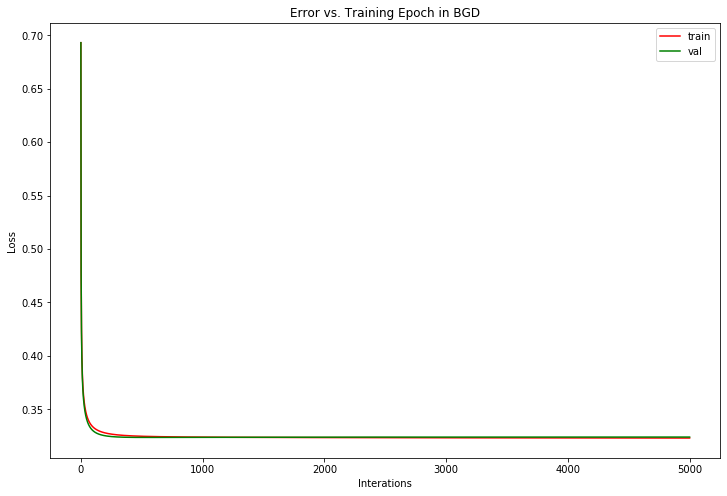

In [15]:
#画出学习曲线
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), train_loss, 'r',label='train')
ax.plot(np.arange(epoch), val_loss, color='green', label='val')
plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Loss')
ax.set_title('Error vs. Training Epoch in BGD')
plt.show()

In [16]:
#计算在验证集的准确率
Y_prediction=predict(new_W,X_val)
correct = [1 if a==b else 0 for (a, b) in zip(Y_prediction, y_val)]
accuracy = sum(correct) / len(correct)
print("正确率：",accuracy)

正确率： 0.8500706344819114


In [17]:
#使用随机批量梯度下降
epoch=5000
alpha=0.01
new_W,train_loss,val_loss=gradientDescent(W,X_train,y_train,X_val,y_val,alpha,method="SGD",epoch=epoch,random_seed=2019,batch_size=200)

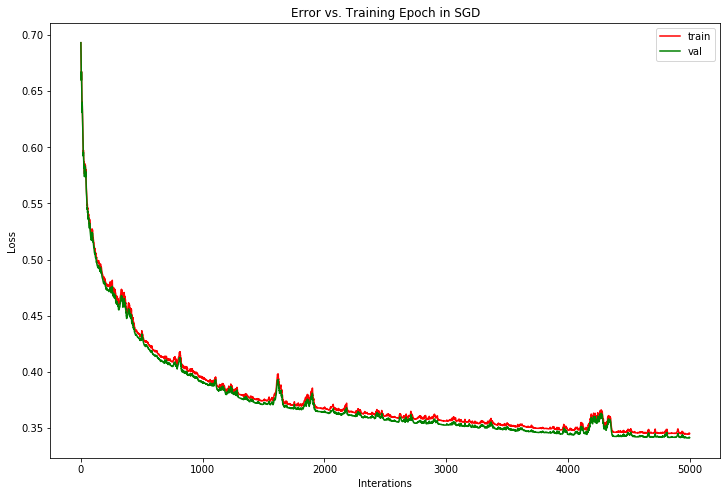

In [18]:
#画出学习曲线
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epoch), train_loss, 'r',label='train')
ax.plot(np.arange(epoch), val_loss, color='green', label='val')
plt.legend() 
ax.set_xlabel('Interations')
ax.set_ylabel('Loss')
ax.set_title('Error vs. Training Epoch in SGD')
plt.show()

In [19]:
#计算在验证集的准确率
Y_prediction=predict(new_W,X_val)
correct = [1 if a==b else 0 for (a, b) in zip(Y_prediction, y_val)]
accuracy = sum(correct) / len(correct)
print("正确率：",accuracy)

正确率： 0.8387076960874639
